In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from gluonts.evaluation import MultivariateEvaluator, Evaluator
from gluonts.evaluation.backtest import make_evaluation_predictions

from hyperparams import Hyperparams
from multivariate_models import models_dict

from gluonts.dataset.common import ListDataset

import warnings
warnings.filterwarnings("ignore")

import os

from gluonts.dataset.rolling_dataset import (
    StepStrategy,
    generate_rolling_dataset,
)
from gluonts.dataset.field_names import FieldName
from gluonts.dataset.util import to_pandas

In [ ]:
from batchuoctrainandplot import data_creation,training_model,truncate_features,metrics_rolling_dataset


In [3]:
params = Hyperparams(hybridize=True)


In [4]:
print('Time test start',params.test_start)
print('Time test end',params.test_end)
print('Batch size',params.batch_size)
print('Model type',params.model_type)
print('Model name',params.modele)

Time test start 2024-03-25 00:00
Time test end 2024-03-31 23:45
Batch size 30
Model type multivariate
Model name DeepNegPol


In [5]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [6]:
train_ds, test_ds, target_dim = data_creation(params.model_type, params.test_end,params)


In [7]:
target_dim

151

In [8]:
predictor=training_model(params.modele,train_ds,target_dim,params=params)

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

In [11]:
forecasts, targets=metrics_rolling_dataset(params.model_type, test_ds, predictor, params,0)

predicting


Running evaluation: 6it [00:00, 101.83it/s]
Running evaluation: 6it [00:00, 110.22it/s]
Running evaluation: 6it [00:00, 140.52it/s]
Running evaluation: 6it [00:00, 113.65it/s]
Running evaluation: 6it [00:00, 97.54it/s]
Running evaluation: 6it [00:00, 120.33it/s]
Running evaluation: 6it [00:00, 120.11it/s]
Running evaluation: 6it [00:00, 86.31it/s]
Running evaluation: 6it [00:00, 89.70it/s]
Running evaluation: 6it [00:00, 88.90it/s]
Running evaluation: 6it [00:00, 151.02it/s]
Running evaluation: 6it [00:00, 115.66it/s]
Running evaluation: 6it [00:00, 124.65it/s]
Running evaluation: 6it [00:00, 120.31it/s]
Running evaluation: 6it [00:00, 117.42it/s]
Running evaluation: 6it [00:00, 116.92it/s]
Running evaluation: 6it [00:00, 115.85it/s]
Running evaluation: 6it [00:00, 149.09it/s]
Running evaluation: 6it [00:00, 95.82it/s]
Running evaluation: 6it [00:00, 122.14it/s]
Running evaluation: 6it [00:00, 144.80it/s]
Running evaluation: 6it [00:00, 118.83it/s]
Running evaluation: 6it [00:00, 124.7

CRPS: 0.8920728582998628
ND: 1.0247764499760335
NRMSE: 3.028756860863825
MSE: 4.438692572281981
CRPS-Sum: 0.4669271234316266
ND-Sum: 0.6116097254590833
NRMSE-Sum: 0.6978603904973183
MSE-Sum: 5373.004909939235
Done


In [10]:
# from pathlib import Path

# # Get the current working directory
# current_directory = Path.cwd()

# # Define the path for the serialization within the current directory
# serialization_path = current_directory / "noex402040(batch40)120epoch"

# # Ensure the directory exists
# serialization_path.mkdir(parents=True, exist_ok=True)

# # Perform the serialization
# predictor.serialize(serialization_path)


In [11]:
import dill
with open('forecasts_and_targetsnoex402040(batch40)120epoch.dill', 'wb') as f:
    dill.dump({'forecasts': forecasts, 'targets': targets}, f)

In [12]:
len(forecasts)

6

In [13]:
forecasts[5].start_date

Timestamp('2024-03-26 00:00:00', freq='15T')

In [15]:
len(forecasts[5].mean)

96

In [14]:
targets[0]

,0,1,2,3,4,5,6,7,8,9,...,575,576,577,578,579,580,581,582,583,584
2024-03-24 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-03-24 00:15:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2024-03-24 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-03-24 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-03-24 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31 22:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-03-31 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-03-31 23:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-03-31 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
forecasts[1].start_date

Timestamp('2024-03-30 18:00:00', freq='15T')

In [11]:
#Sửa code để hiện legend đẹp
def plot2(target, forecast, prediction_length, dim, prediction_intervals=(50.0, 90.0), color='r', fname=None):
    label_prefix = ""
    fig, ax = plt.subplots(figsize=(8, 4))  # Directly using `ax` for the single subplot
    seq_len, target_dim = target.shape
    ps = [50.0] + [
            50.0 + f * c / 2.0 for c in prediction_intervals for f in [-1.0, +1.0]
        ]
        
    percentiles_sorted = sorted(set(ps))
    def alpha_for_percentile(p):
        return (p / 100.0) ** 0.3 
    target[-2 * prediction_length :][dim].plot(ax=ax, label="real")
    ps_data = [forecast.quantile(p / 100.0)[:, dim] for p in percentiles_sorted]
    i_p50 = len(percentiles_sorted) // 2
    
    p50_data = ps_data[i_p50]
    p50_series = pd.Series(data=p50_data, index=forecast.index)
    p50_series.plot(color=color, ls="-", label=f"{label_prefix}median predicted samples", ax=ax)
    
    for i in range(len(percentiles_sorted) // 2):
        ptile = percentiles_sorted[i]
        alpha = alpha_for_percentile(ptile)
        ax.fill_between(
            forecast.index,
            ps_data[i],
            ps_data[-i - 1],
            facecolor=color,
            alpha=alpha,
            interpolate=True
        )
        
        # Creating a single point series to label the intervals
        single_point_series = pd.Series(data=p50_data[:1], index=forecast.index[:1])
        single_point_series.plot(
            color=color,
            alpha=alpha,
            linewidth=10,
            label=f"{label_prefix}{100 - ptile * 2}%",
            ax=ax
        )
    
    ax.legend()  # Add legend
    return p50_series  # Return the median series


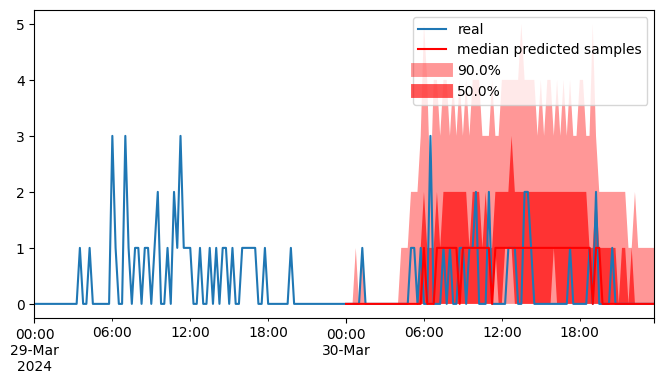

In [60]:
test=plot2(target=targets[1], forecast=forecasts[1], prediction_length=96, dim=150, prediction_intervals=(50.0, 90.0), color='r', fname=None)

In [61]:
forecasts[2].mean

array([[0.02, 0.01, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , ..., 0.  , 0.  , 0.02],
       [0.02, 0.05, 0.  , ..., 0.02, 0.  , 0.11],
       ...,
       [0.07, 0.08, 0.04, ..., 0.  , 0.01, 0.21],
       [0.1 , 0.01, 0.08, ..., 0.04, 0.02, 0.14],
       [0.05, 0.02, 0.03, ..., 0.01, 0.06, 0.15]], dtype=float32)

In [52]:
data=np.array(forecasts[2].mean)
df = pd.DataFrame(data)


In [53]:
df

,0,1,2,3,4,5,6,7,8,9,...,575,576,577,578,579,580,581,582,583,584
0,0.02,0.01,0.00,0.0,0.00,0.00,0.01,0.19,0.00,0.00,...,0.72,0.30,0.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.16,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.02
2,0.02,0.05,0.00,0.0,0.00,0.02,0.00,0.01,0.00,0.00,...,0.33,0.03,0.14,0.00,0.00,0.00,0.00,0.02,0.00,0.11
3,0.15,0.02,0.00,0.0,0.00,0.02,0.00,0.03,0.00,0.00,...,0.05,0.01,0.04,0.00,0.01,0.00,0.00,0.00,0.00,0.05
4,0.10,0.00,0.01,0.0,0.02,0.00,0.03,0.06,0.02,0.00,...,0.12,0.00,0.01,0.00,0.02,0.00,0.02,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.09,0.02,0.03,0.0,0.05,0.04,0.03,0.08,0.04,0.01,...,0.13,0.09,0.12,0.05,0.05,0.07,0.05,0.02,0.02,0.10
92,0.07,0.06,0.05,0.0,0.02,0.05,0.04,0.03,0.01,0.02,...,0.15,0.04,0.17,0.11,0.03,0.11,0.05,0.01,0.00,0.18
93,0.07,0.08,0.04,0.0,0.03,0.00,0.02,0.05,0.02,0.00,...,0.14,0.07,0.12,0.17,0.05,0.01,0.10,0.00,0.01,0.21
94,0.10,0.01,0.08,0.0,0.07,0.05,0.05,0.00,0.06,0.00,...,0.05,0.09,0.10,0.06,0.03,0.03,0.05,0.04,0.02,0.14


In [54]:
df.to_csv('thuan.csv')